<img src="../imgs/tensorflow_head.png" />

# Tensorflow

>**TensorFlow** (https://www.tensorflow.org/) is a software library, developed by Google Brain Team within Google's Machine Learning Intelligence research organization, for the purposes of conducting machine learning and deep neural network research. 

>TensorFlow combines the computational algebra of compilation optimization techniques, making easy the calculation of many mathematical expressions that would be difficult to calculate, instead.



## Tensorflow Main Features

* Defining, optimizing, and efficiently calculating mathematical expressions involving multi-dimensional arrays (tensors).

* Programming support of **deep neural networks** and machine learning techniques.

* Transparent use of GPU computing, automating management and optimization of the same memory and the data used. You can write the same code and run it either on CPUs or GPUs. More specifically, TensorFlow will figure out which parts of the computation should be moved to the GPU.

* High scalability of computation across machines and huge data sets.


>TensorFlow is available with Python and C++ support, but the **Python API** is better supported and much easier to learn.

In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-18 

CPython 3.5.3
IPython 6.2.1

watermark 1.6.0
numpy 1.13.3
pandas 0.22.0
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.0.0
chainer 3.3.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.5/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Very Preliminary Example

In [2]:
# A simple calculation in Python
x = 1
y = x + 10
print(y)

11


In [3]:
import tensorflow as tf

In [4]:
# The ~same simple calculation in Tensorflow
x = tf.constant(1, name='x')
y = tf.Variable(x+10, name='y')
print(y)

<tf.Variable 'y:0' shape=() dtype=int32_ref>


**Meaning**: "When the variable `y` is computed, take the value of the constant `x` and add `10` to it"

## Sessions and Models

To actually calculate the value of the `y` variable and to evaluate expressions, we need to **initialise** the variables, and then create a **session** where the actual computation happens

In [5]:
model = tf.global_variables_initializer()  # model is used by convention

In [6]:
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

11


## Data Flow Graph

* (**IDEA**) 
_A Machine Learning application is the result of the repeated computation of complex mathematical expressions, thus 
we could describe this computation by using a **Data Flow Graph**

* **Data Flow Graph**: a graph where:
    - each Node represents the _instance_ of a mathematical operation 
        - `multiply`, `add`, `divide`
    - each Edge is a multi-dimensional data set (`tensors`) on which the operations are performed.

## Tensorflow Graph Model

* **Node**: In TensorFlow, each node represents the instantion of an operation. 
    - Each operation has inputs (`>= 2`) and outputs `>= 0`.
    
* **Edges**: In TensorFlow, there are two types of edge:
    - Data Edges: 
    They are carriers of data structures (`tensors`), where an output of one operation (from one node) becomes the input for another operation.
    - Dependency Edges: These edges indicate a _control dependency_ between two nodes (i.e. "happens before" relationship). 
        + Let's suppose we have two nodes `A` and `B` and a dependency edge connecting `A` to `B`. This means that `B` will start its operation only when the operation in `A` ends. 

## Tensorflow Graph Model (cont.)

* **Operation**: This represents an abstract computation, such as adding or multiplying matrices. 
    - An operation manages tensors, and It can just be polymorphic: the same operation can manipulate different tensor element types. 
        + For example, the addition of two int32 tensors, the addition of two float tensors, and so on.

* **Kernel**: This represents the concrete implementation of that operation. 
    - A kernel defines the implementation of the operation on a particular device. 
        + For example, an `add matrix` operation can have a CPU implementation and a GPU one.

## Tensorflow Graph Model Session

**Session**: When the client program has to establish communication with the TensorFlow runtime system, a session must be created. 
    
As soon as the session is created for a client, an initial graph is created and is empty. It has two fundamental methods:

* `session.extend`: To be used during a computation, requesting to add more operations (nodes) and edges (data). The execution graph is then extended accordingly.

* `session.run`: The execution graphs are executed to get the outputs (sometimes, subgraphs are executed thousands/millions of times using run invocations).

# Tensorboard

**TensorBoard** is a visualization tool, devoted to analyzing Data Flow Graph and also to better understand the machine learning models. 

It can view different types of statistics about the parameters and details of any part of a computer graph graphically. It often happens that a graph of computation can be very complex.

## Tensorboard Example

Run the **TensorBoard** Server:

```shell
tensorboard --logdir=/tmp/tf_logs
```

[Open TensorBoard](http://localhost:6006)

### Example

In [7]:
a = tf.constant(5, name="a")
b = tf.constant(45, name="b")
y = tf.Variable(a+b*2, name='y')
model = tf.global_variables_initializer()

with tf.Session() as session:
    # Merge all the summaries collected in the default graph.
    merged = tf.summary.merge_all() 
    
    # Then we create `SummaryWriter`. 
    # It will write all the summaries (in this case the execution graph) 
    # obtained from the code's execution into the specified path”
    writer = tf.summary.FileWriter("tmp/tf_logs_simple", session.graph)
    session.run(model)
    print(session.run(y))

95


# Data Types (Tensors)

## One Dimensional Tensor (Vector)

In [8]:
import numpy as np
tensor_1d = np.array([1, 2.5, 4.6, 5.75, 9.7])
tf_tensor=tf.convert_to_tensor(tensor_1d,dtype=tf.float64)

In [9]:
with tf.Session() as sess: 
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[2]))

[ 1.    2.5   4.6   5.75  9.7 ]
1.0
4.6


## Two Dimensional Tensor (Matrix)

In [10]:
tensor_2d = np.arange(16).reshape(4, 4)
print(tensor_2d)
tf_tensor = tf.placeholder(tf.float32, shape=(4, 4))
with tf.Session() as sess:
    print(sess.run(tf_tensor, feed_dict={tf_tensor: tensor_2d}))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[  0.   1.   2.   3.]
 [  4.   5.   6.   7.]
 [  8.   9.  10.  11.]
 [ 12.  13.  14.  15.]]


# Basic Operations (Examples)

In [11]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype='float32') 
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype='float32')

In [12]:
tf_mat1 = tf.constant(matrix1) 
tf_mat2 = tf.constant(matrix2)

In [13]:
matrix_product = tf.matmul(tf_mat1, tf_mat2)
matrix_sum = tf.add(tf_mat1, tf_mat2)

In [14]:
matrix_det = tf.matrix_determinant(matrix2)

In [15]:
with tf.Session() as sess: 
    prod_res = sess.run(matrix_product) 
    sum_res = sess.run(matrix_sum) 
    det_res = sess.run(matrix_det)

In [16]:
print("matrix1*matrix2 : \n", prod_res)
print("matrix1+matrix2 : \n", sum_res)
print("det(matrix2) : \n", det_res)

matrix1*matrix2 : 
 [[ 6.  6.  6.]
 [ 6.  6.  6.]
 [ 6.  6.  6.]]
matrix1+matrix2 : 
 [[ 3.  3.  3.]
 [ 3.  3.  3.]
 [ 3.  3.  3.]]
det(matrix2) : 
 0.0


# Handling Tensors

In [17]:
%matplotlib inline

In [18]:
import matplotlib.image as mp_image
filename = "../imgs/keras-logo-small.jpg"
input_image = mp_image.imread(filename)

In [19]:
#dimension
print('input dim = {}'.format(input_image.ndim))
#shape
print('input shape = {}'.format(input_image.shape))

input dim = 3
input shape = (300, 300, 3)


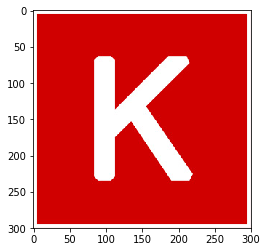

In [20]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

### Slicing

In [21]:
my_image = tf.placeholder("uint8",[None,None,3])
slice = tf.slice(my_image,[10,0,0],[16,-1,-1])

In [22]:
with tf.Session() as session:
    result = session.run(slice,feed_dict={my_image: input_image})
    print(result.shape)

(16, 300, 3)


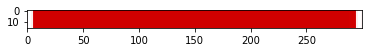

In [23]:
plt.imshow(result)
plt.show()

## Transpose

In [24]:
x = tf.Variable(input_image,name='x')
model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    session.run(model)
    result=session.run(x)

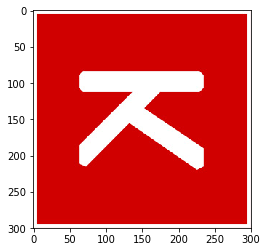

In [25]:
plt.imshow(result)
plt.show()

## Computing the Gradient

- Gradients are free!

In [26]:
x = tf.placeholder(tf.float32)
y = tf.log(x)   
var_grad = tf.gradients(y, x)
with tf.Session() as session:
    var_grad_val = session.run(var_grad, feed_dict={x:2})
    print(var_grad_val)

[0.5]


# Why Tensorflow ?

On a typical system, there are multiple computing devices. 

In TensorFlow, the supported device types are **CPU** and **GPU**. 

They are represented as strings. For example:

* `"/cpu:0"`: The CPU of your machine.
* `"/gpu:0"`: The GPU of your machine, if you have one.
* `"/gpu:1"`: The second GPU of your machine, etc.

If a TensorFlow operation has both **CPU** and **GPU** implementations, the GPU devices will be given priority when the operation is assigned to a device. 

For example, `matmul` has both CPU and GPU kernels. On a system with devices `cpu:0` and `gpu:0`, `gpu:0` will be selected to run `matmul`.

### Example 1. Logging Device Placement

`tf.Session(config=tf.ConfigProto(log_device_placement=True))`

```python
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))
```

```
Device mapping:
/job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GTX 760, pci bus
id: 0000:05:00.0
b: /job:localhost/replica:0/task:0/gpu:0
a: /job:localhost/replica:0/task:0/gpu:0
MatMul: /job:localhost/replica:0/task:0/gpu:0
[[ 22.  28.]
 [ 49.  64.]]
```

## Using Multiple GPUs

```python
# Creates a graph.
c = []
for d in ['/gpu:0', '/gpu:1']:
  with tf.device(d):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
    c.append(tf.matmul(a, b))
with tf.device('/cpu:0'):
  sum = tf.add_n(c)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print sess.run(sum)
```

```
Device mapping:
/job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GTX 760, pci bus
id: 0000:02:00.0
/job:localhost/replica:0/task:0/gpu:1 -> device: 1, name: GeForce GTX 760, pci bus
id: 0000:03:00.0
Const_3: /job:localhost/replica:0/task:0/gpu:0
Const_2: /job:localhost/replica:0/task:0/gpu:0
MatMul_1: /job:localhost/replica:0/task:0/gpu:0
Const_1: /job:localhost/replica:0/task:0/gpu:1
Const: /job:localhost/replica:0/task:0/gpu:1
MatMul: /job:localhost/replica:0/task:0/gpu:1
AddN: /job:localhost/replica:0/task:0/cpu:0
[[  44.   56.]
 [  98.  128.]]
```

## More on Tensorflow

[Official Documentation](https://www.tensorflow.org/versions/r0.10/get_started/)